# iris 붓꽃 Data 다루기 // Classification 분류!!

In [41]:
import pandas as pd
from sklearn import datasets
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB

In [2]:
iris = datasets.load_iris()

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
# 3개일떄 f1 score쓰면 error남 , 다른방식으로 해야함~

In [7]:
df= pd.DataFrame(iris.data, columns=iris.feature_names)

In [8]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
df['target']= iris.target

In [11]:
df #target 은 붓꽃이름이 mapping 되있음 (0 : setosa, 1: versicolor, 2:virginica )

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [12]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [14]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [17]:
ft_col='sepal length (cm)',	'sepal width (cm)'	,'petal length (cm)'	,'petal width (cm)'

In [19]:
for ft in ft_col :
    print(df.groupby('target')[[ft]].mean())

        sepal length (cm)
target                   
0                   5.006
1                   5.936
2                   6.588
        sepal width (cm)
target                  
0                  3.428
1                  2.770
2                  2.974
        petal length (cm)
target                   
0                   1.462
1                   4.260
2                   5.552
        petal width (cm)
target                  
0                  0.246
1                  1.326
2                  2.026


In [20]:
df.groupby('target').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
0,5.006,3.428,1.462,0.246
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026


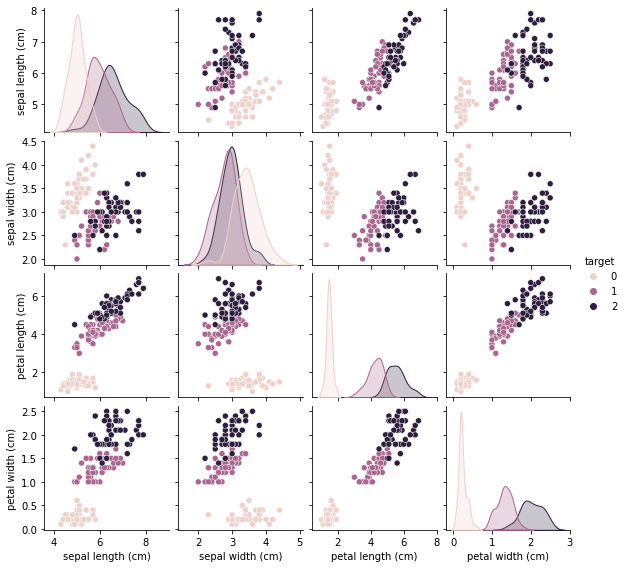

In [23]:
sns.pairplot(df, hue='target', height=2) 
# 3개가 분포가 확연하게 나눠짐 // 나누기 쉬운 데이터

In [24]:
data = df.drop('target', axis=1)

In [25]:
target = df['target']

In [26]:
target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [28]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=1)

In [29]:
print(x_train.shape)
print(y_train.shape)

(112, 4)
(112,)


In [30]:
print(x_test.shape)
print(y_test.shape)

(38, 4)
(38,)


## 1. KNeighborsClassifier 모델

In [62]:
knn = KNeighborsClassifier(n_neighbors=3) # n_neighbors의 수치가 너무작으면 정확한 값을 예측하기 힘들다? / 너무크면 과적합

In [63]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [35]:
knn.score(x_train, y_train)

0.9464285714285714

In [36]:
knn.score(x_test, y_test)

1.0

In [38]:
pred= knn.predict(x_test)

In [40]:
f1_score(pred, y_test, average='macro') # 목표타겟이 세 개 이기 때문에 'macro'를 씀

1.0

## 2. GaussianNB 모델 (확률과 관련된)

In [43]:
nb = GaussianNB()

In [44]:
nb.fit(x_train, y_train)

GaussianNB()

In [45]:
nb.score(x_train, y_train)

0.9464285714285714

In [46]:
nb.score(x_test, y_test)

0.9736842105263158

---------------------

### 모델 활용을 위한 기본 라이브러리 셋 선언

In [49]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [50]:
iris = datasets.load_iris()

In [51]:
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=0)

In [64]:
models = {'KNN' : KNeighborsClassifier(n_neighbors=3),
          'NB' : GaussianNB()} #모델을  dict로 만들어서 for문 이용해서 한꺼번에 정확도 측정

In [65]:
for name, model in models.items() : #그냥 모델이 아닌 model.items() 를써야 dict의 key, value값을 꺼내 for구문에서 쓸 수 있음
    #print(name, model)
    model.fit(x_train, y_train)
    pred= model.predict(x_test)
    score= accuracy_score(pred, y_test)
    print("{:>3s} : {:0.2f}".format(name, score)) # 왼쪽 문자열은 글자까지 // 오른쪽 숫자는 소수점 두자리까지

KNN : 0.97
 NB : 1.00
